# A joint model CAR (model 2) 
## Common Markov Gaussian Random Field
 $$ [P , S ] = [P | GMRF] [ S | GMRF] $$

In [28]:
## Import code:
setwd('/apps/external_plugins/biospytial_rwrapper/biospytial.rwrapper/R/')

In [29]:
rm(list=ls())                                                                                     
source("init_data.R")                                                                             
# load the building function                                                                      
source("joint.binomial.bymCAR.R")                                                                 


In [30]:
dim(DataFrame)

[1] 4061   27

In [31]:
dim(rr)

ERROR: Error in eval(expr, envir, enclos): object 'rr' not found


In [32]:
dim(M_bis)

[1] 4060 4060

In [33]:
n.sample = 120000                                                                               
burnin=25000                                                                                      
postburnin = burnin +1000                                                                         
thin = 10
verbose = TRUE
c <- 1 # Ahora no tiene relevancia en el algoritmo
fixed_prior_gamma_shape_tau <-0.1
prior_tau_scale <- 1
prior_sigma_scale <- 1
fixed_prior_gamma_shape_sigma <- 0.1

results  <- joint.binomial.bymCARModel2(formula_S = formula_sample, 
                                        formula_P = formula_presence,
                                        n.sample=n.sample,
                                        burnin=burnin,
                                        postburnin=postburnin,
                                        thin=thin,
                                        verbose=TRUE,
                                       prior.tau2=c(fixed_prior_gamma_shape_tau,prior_tau_scale),
                                       prior.sigma2=c(fixed_prior_gamma_shape_sigma,prior_sigma_scale),
                                        tau2_sigma2_denominator=c,
                                       #prior.tau2=c(0.1,1),
                                       #prior.sigma2=c(0.1,1),
                                       data = DataFrame)
                                       #data = rr)



Setting up the model.
Performing burnin period for Sample Effort Model 
  |======================================================================| 100%
Summarising results.
Finished in  197.2 seconds.
Setting up the model.
Performing burnin period for Presence model 
  |======================================================================| 100%
Summarising results.
Finished in  192 seconds.
Sampling from the joint model 12000 post burnin and thinned (if requested) samples.
  |                                                                      |   0%[1] "common phi"
  |======================================================================| 100%
[1] "Compiling summary for S process"
[1] "Compiling summary for the P process"


## Remember to check likelihood modelfit

In [48]:
#Change priors tau2 and sigma2
#0.1 , 0.01


In [53]:
results$S$modelfit

DIC           p.d          WAIC           p.w          LMPL 
          Inf           Inf   3045083.359   1522172.233   -641806.832 
loglikelihood 
    -1627.506

In [54]:
results$P$modelfit

DIC           p.d          WAIC           p.w          LMPL 
          NaN           NaN     16549.145      7181.414    -33024.165 
loglikelihood 
         -Inf

In [36]:
results$S$summary.results

,Median,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
(Intercept),8.6588,8.6588,8.6588,12000,49.1,12000.0,-1.0
Disttoroadm,-0.0004,-0.0004,-0.0004,12000,49.1,12000.0,-1.0
Populationm,0.0000,0.0000,0.0000,12000,49.1,12000.0,1.0
tau2,34315.8974,21788.8592,37195.5234,12000,100.0,17.6,-1.3
sigma2,305933.0487,285045.1902,319795.3088,12000,100.0,21.9,-0.7


## Independent models

In [37]:
results$ind.model.S$model.results


#################
#### Model fitted
#################
Likelihood model - Binomial (logit link function) 
Random effects model - BYM CAR
Regression equation - sample ~ Disttoroadm + Populationm
Number of missing observations - 731

############
#### Results
############
Posterior quantities and DIC

             Median    2.5%   97.5% n.sample % accept n.effective Geweke.diag
(Intercept)  3.5078  2.6822  4.2464     1000     49.1        51.2        -1.0
Disttoroadm -0.0004 -0.0006 -0.0001     1000     49.1        89.6         1.1
Populationm  0.0000 -0.0002  0.0002     1000     49.1       127.7         0.3
tau2        20.0487 13.9184 28.8371     1000    100.0         1.9         2.5
sigma2       3.3879  1.0902  5.5670     1000    100.0         1.2       -14.2

DIC =  1723.837       p.d =  668.2677       LMPL =  -1045.41 

In [38]:
results$ind.model.P$model.results


#################
#### Model fitted
#################
Likelihood model - Binomial (logit link function) 
Random effects model - BYM CAR
Regression equation - species ~ Elevationm + MeanTempm
Number of missing observations - 0

############
#### Results
############
Posterior quantities and DIC

             Median    2.5%   97.5% n.sample % accept n.effective Geweke.diag
(Intercept) -6.7475 -7.9506 -5.6572     1000     49.7        22.3         2.6
Elevationm   0.0000 -0.0003  0.0004     1000     49.7        49.4         1.5
MeanTempm   -0.0009 -0.0013 -0.0005     1000     49.7        45.4        -1.3
tau2        34.8671 22.4709 41.8080     1000    100.0         2.8         1.8
sigma2       2.0931  1.6901  2.9090     1000    100.0         4.8        -0.3

DIC =  1234.716       p.d =  493.7521       LMPL =  -768.9 

In [39]:
## Remove samples, like a post post burnin
#post.sample_p = post.sample_p[(nrow(post.sample_p) - 8000) : nrow(post.sample_p),]
#post.presence_p = post.presence_p[(nrow(post.presence_p) - 8000) : nrow(post.presence_p),]

## Some plots and analysis for convergence


In [40]:
library(coda)

## $\tau^{2}$

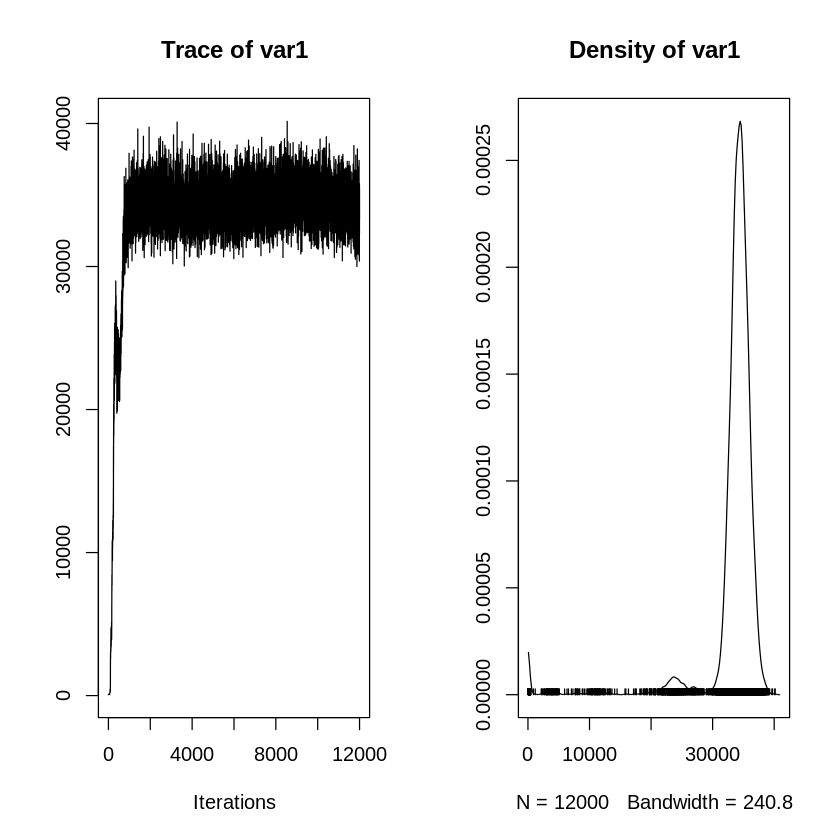

In [41]:
plot(results$S$samples$tau2)
#plot(results$ind.model.S$model.results$samples$tau2)
#plot(results$ind.model.P$model.results$samples$tau2)

## $\sigma^2$

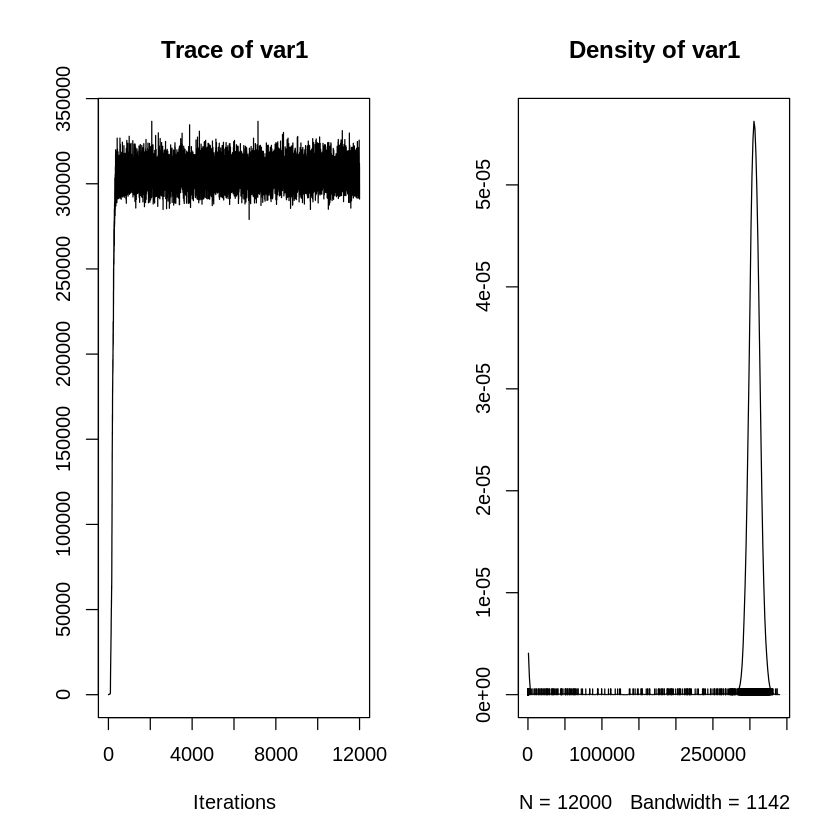

In [42]:
plot(results$S$samples$sigma2)
#plot(results$ind.model.S$model.results$samples$sigma2)
#plot(results$ind.model.P$model.results$samples$sigma2)

## $\beta$

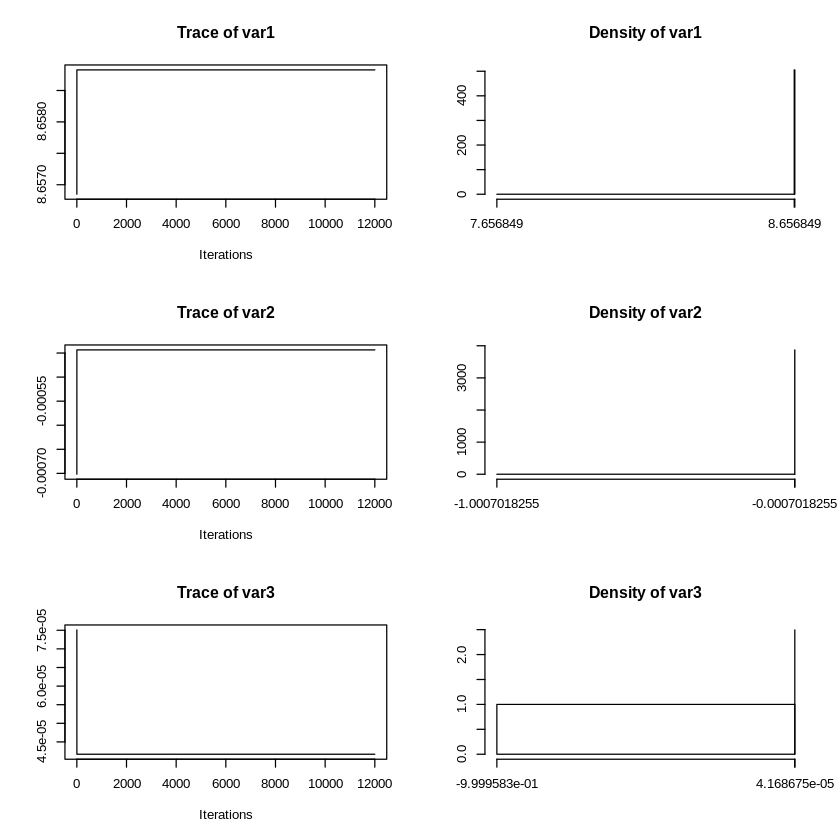

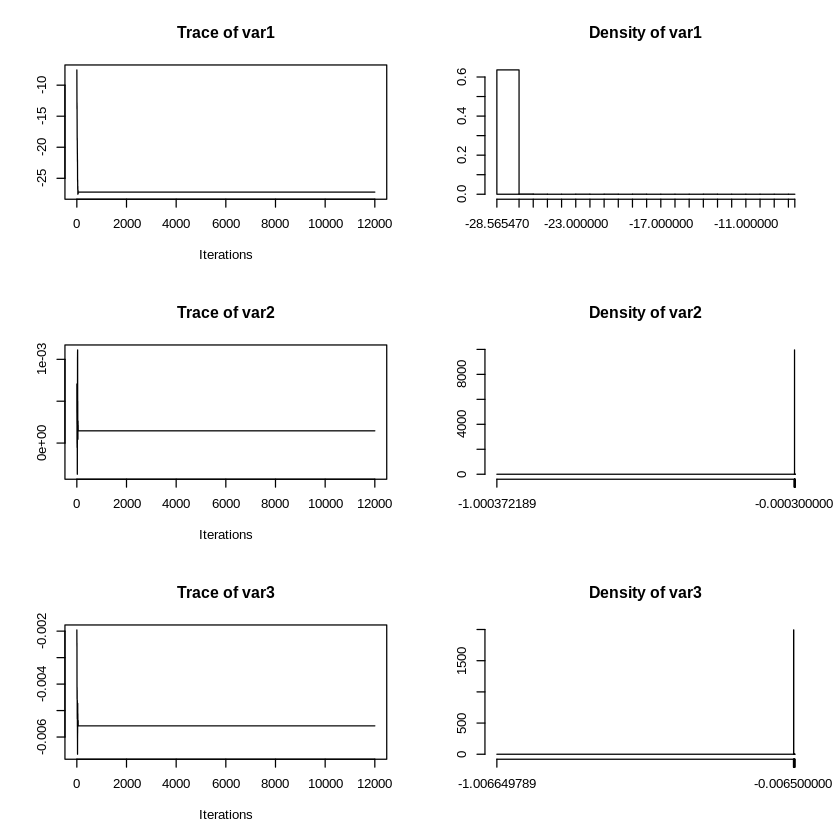

In [43]:
plot(results$S$samples$beta)
plot(results$P$sample$beta)
#plot(results$ind.model.S$model.results$samples$tau2)
#plot(results$ind.model.P$model.results$samples$tau2)

## Diagnostics, Mr. Gelmans, et.al

In [44]:
post.sample_p = data.frame(results$S$samples$fitted)
post.presence_p = data.frame(results$P$samples$fitted)

## Sample the posterior 

In [45]:
pss  <- post.sample_p %>% mutate_all(function(p) rbernoulli(1,p))
pps <- post.presence_p %>% mutate_all(function(p) rbernoulli(1,p))                                        

In [46]:

sumpps <- colSums(pps)

In [47]:
sumpss <- colSums(pss)

In [48]:
prob_pps <- sumpps / length(pps)

In [49]:
prob_pss <- sumpss / length(pss)

In [50]:
probpres = prob_pps * prob_pss

In [51]:
## save to posterity
# Save output sample to display in python
## Save the complete chain trace for analysing in Python,
TDF = read.csv("/outputs/training_data_sample_puebla_p9_abies_pinophyta.csv")
## Order it according to the id of the cell
## This is important because the adjancy matrix rows need to be the same
TDF = TDF[order(TDF$cell_ids),]

In [52]:
chain = cbind(TDF$cell_ids,probpres,prob_pps,prob_pss)
file_ = '/outputs/presence_only_models/modelCAR_model2_fitted.csv'
write.csv(chain,file_)

## Posterior análisis with a varying C $\tau^2, \sigma^2$ denominator

In [609]:
# Read the file
bfile = '/outputs/presence_only_models/joint-model2-benchmark-denominator.csv'
res <- read.csv(bfile)

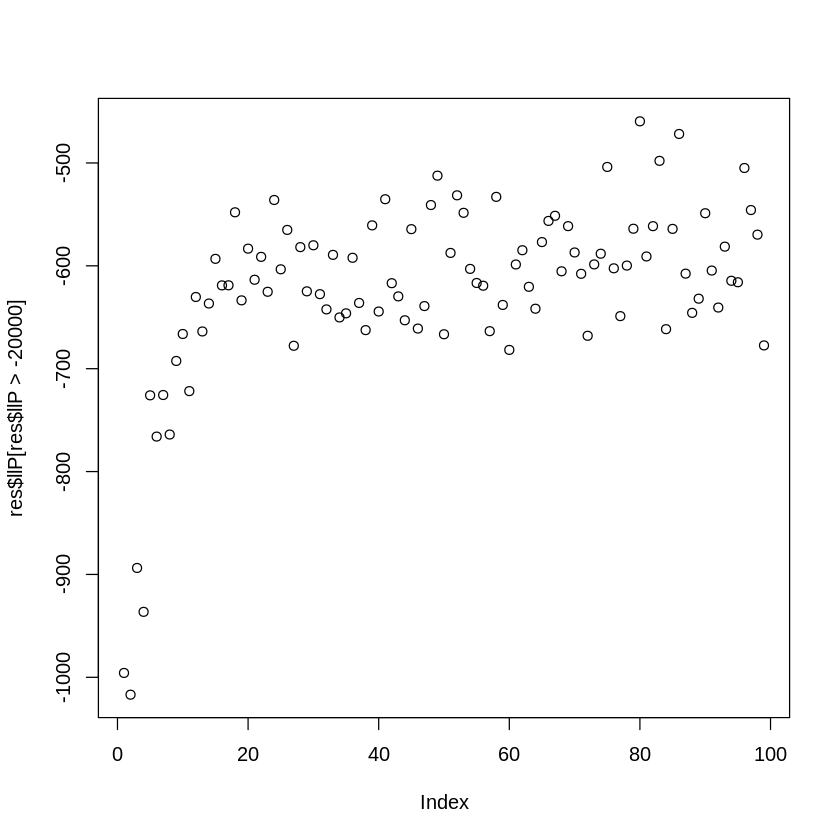